In [1]:
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
num_oper_unit = int(input("Input the number of Operating Units \n"))
num_Repair_Chan = int(input("Input The number of Repair Channel \n"))
num_Spare_Units = int(input("Input The number of Spare Standby Units \n"))
Lambda = float(input("Input the failure Rate i.e 1/MTBF \n"))
mu = float(input("Input the Repair Rate i.e. 1/MTTR \n"))
C = []
s = 0
if(num_Repair_Chan > num_Spare_Units):
    for i in range(1,num_Spare_Units+1):
        c = (pow(num_oper_unit*Lambda,i))/((math.factorial(i)*pow(mu,i)))
        s = s+c
        C.append(c)
    for i in range(num_Spare_Units+1,num_Repair_Chan+1):
        c = (pow(num_oper_unit,num_Spare_Units)*pow(Lambda,i)*math.factorial(num_oper_unit))/((math.factorial(i)*pow(mu,i)*math.factorial(num_oper_unit+num_Spare_Units-i)))
        s = s+c
        C.append(c)
    for i in range(num_Repair_Chan+1,num_oper_unit+num_Spare_Units+1):
        c = (pow(num_oper_unit,num_Spare_Units)*pow(Lambda,i)*math.factorial(num_oper_unit))/((math.factorial(num_Repair_Chan)*pow(mu,i)*pow(num_Repair_Chan,i-num_Repair_Chan)*(math.factorial(num_oper_unit+num_Spare_Units-i))))
        s = s+c
        C.append(c)
elif(num_Repair_Chan <= num_Spare_Units):
    for i in range(1,num_Repair_Chan+1):
        c = (pow(num_oper_unit*Lambda,i))/((math.factorial(i)*pow(mu,i)))
        s = s+c
        C.append(c)
    for i in range(num_Repair_Chan+1+1,num_Spare_Units+1):
        c = (pow(num_oper_unit*Lambda,i))/((math.factorial(num_Repair_Chan)*pow(mu,i)*pow(num_Repair_Chan,i-num_Repair_Chan)))
        s = s+c
        C.append(c)
    for i in range(num_Spare_Units+1,num_oper_unit+num_Spare_Units+1):
        c = (pow(num_oper_unit,num_Spare_Units)*pow(Lambda,i)*math.factorial(num_oper_unit))/((math.factorial(num_Repair_Chan)*pow(mu,i)*pow(num_Repair_Chan,i-num_Repair_Chan)*(math.factorial(num_oper_unit+num_Spare_Units-i))))
        s = s+c
        C.append(c)    
P0 = 1/(1+s)
Pn = [i * P0 for i in C]
Num_Units_Repair = 0
for i in range(1,num_oper_unit+num_Spare_Units+1):
    Num_Units_Repair = Num_Units_Repair + i * Pn[i-1]
print("\n Average Number of Units in Repair at Any given Time is = ", round(Num_Units_Repair,2))
probability_Sum1 = 0
probability_Sum2 = 0 
for i in range(0,num_Spare_Units+1):
    if(i==0):
        probability_Sum1 = probability_Sum1+P0
    elif(i>0):
        probability_Sum1 = probability_Sum1+Pn[i-1]
probability_Sum1 = num_oper_unit*probability_Sum1
for i in range(num_Spare_Units+1,num_oper_unit+num_Spare_Units+1):
    probability_Sum2=probability_Sum2+(num_oper_unit+num_Spare_Units-i)*Pn[i-1]
Num_Units_Operating = probability_Sum1+probability_Sum2
print("\n Average Number of Units Which are in Operation at any given Time is = ", round(Num_Units_Operating,2)) 
Avg_Arrival_Rate = 0
Avg_Arrival_Rate1 = 0
Avg_Arrival_Rate2 = 0
for i in range(0,num_Spare_Units+1):
    if(i==0):
        Avg_Arrival_Rate1 = Avg_Arrival_Rate1+P0
    elif(i>0):
        Avg_Arrival_Rate1 = Avg_Arrival_Rate1+Pn[i-1]
Avg_Arrival_Rate1 = num_oper_unit*Lambda*Avg_Arrival_Rate1
for i in range(num_Spare_Units+1,num_oper_unit+num_Spare_Units+1):
    Avg_Arrival_Rate2=Avg_Arrival_Rate2+(num_oper_unit+num_Spare_Units-i)*Pn[i-1]
Avg_Arrival_Rate2 = Lambda*Avg_Arrival_Rate2
Avg_Arrival_Rate = Avg_Arrival_Rate1+Avg_Arrival_Rate2
total_Downtime = Num_Units_Repair/Avg_Arrival_Rate
print("\n Total Downtime including Repair Time and Maintenance Delay Time is = ", round(total_Downtime,2))
percentage_Utilization = 100*Num_Units_Operating/num_oper_unit
print("\n Percentage Utilization of the System is = ",round(percentage_Utilization,2), '%')

Input the number of Operating Units 
3
Input The number of Repair Channel 
2
Input The number of Spare Standby Units 
1
Input the failure Rate i.e 1/MTBF 
2
Input the Repair Rate i.e. 1/MTTR 
3

 Average Number of Units in Repair at Any given Time is =  1.74

 Average Number of Units Which are in Operation at any given Time is =  2.11

 Total Downtime including Repair Time and Maintenance Delay Time is =  0.41

 Percentage Utilization of the System is =  70.49 %


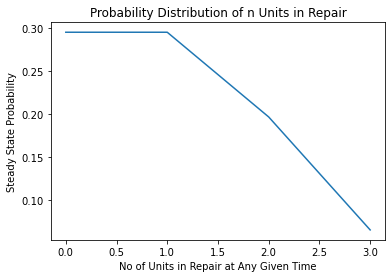

<Figure size 720x720 with 0 Axes>

In [3]:
plt.plot(Pn)
plt.xlabel('No of Units in Repair at Any Given Time')
plt.ylabel('Steady State Probability')
plt.title('Probability Distribution of n Units in Repair')
plt.figure(figsize=(10, 10))
plt.show()